In [1]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
import matplotlib.pyplot as plt

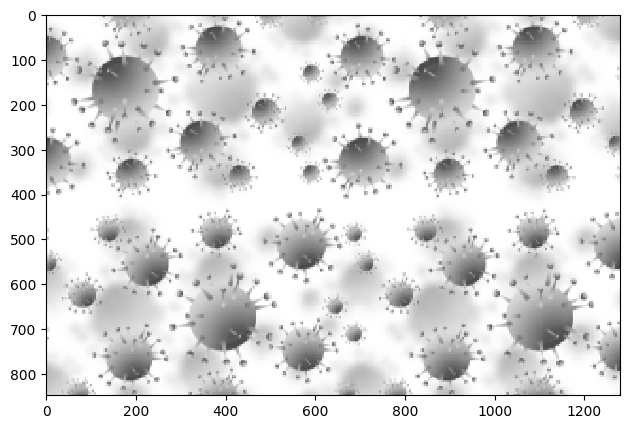

In [2]:
im = imread('virus.png')
if im.shape[-1] == 4:  # Überprüfen, ob das Bild 4 Kanäle hat (RGBA)
    im = im[:, :, :3]  # Nur die ersten 3 Kanäle (RGB) auswählen
im = rgb2gray(im)
imshow(im)
#im = rgb2gray(imread('virus.png'))
#im= data.hubble_deep_field()[0:500, 0:500]
#im = rgb2gray(im)

We used the rgb2gray function of scikit-image to convert the RGB image to grayscale.
In order to convert this grayscale image to a binary image, we need to set a threshold. For this exercise, let us assume a threshold of 0.8.

c:\Users\maxbe\Medical_image_processing\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


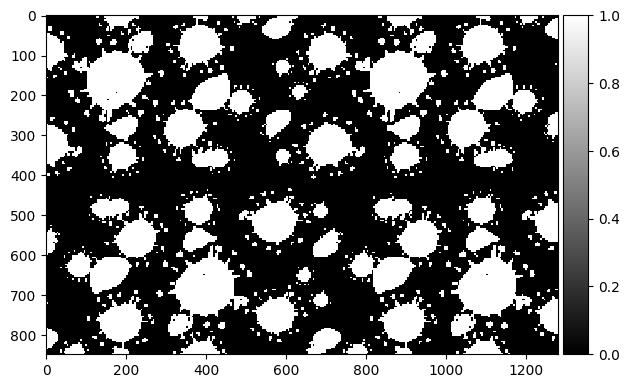

In [3]:
im_bw = (im < 0.8) * 1
im_mask = im < 0.8
imshow(im_bw, cmap='gray');

im_bw and im_mask are both analogous with each other, with the former composed of 0 and 1, while the latter with booleans (True or False). We will need both of them for the following implementation.

# Laplacian of Gaussian (LoG)

This method involves convolving an image with the Laplacian of a Gaussian filter at multiple scales. The resulting image highlights regions with significant intensity variations, which correspond to blobs in the original image.

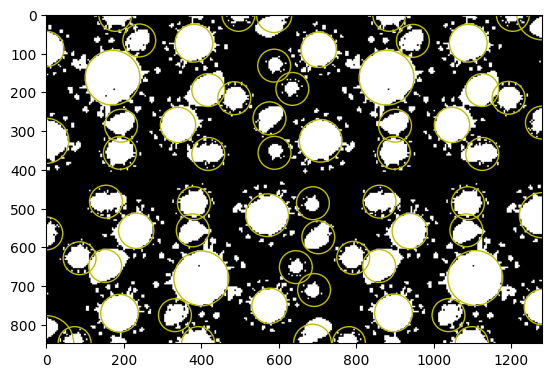

In [4]:
from skimage.feature import blob_log

blobs = blob_log(im_mask, min_sigma=30, max_sigma=50, num_sigma=10, threshold=0.1)

fig, ax = plt.subplots()
ax.imshow(im_bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*sqrt(2), color='y', fill=False))
plt.show()

# Difference of Gaussian (DoG)

This method involves computing the difference between two Gaussian-filtered versions of an image at different scales. This technique emphasizes regions with significant intensity changes, which are indicative of blobs.

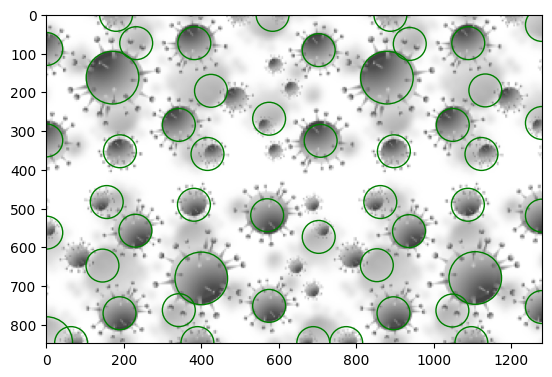

In [5]:
blobs = blob_dog(im_mask, min_sigma=30, max_sigma=50, threshold=.1)

fig, ax = plt.subplots()
ax.imshow(im, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*sqrt(2), color='g', fill=False))
plt.show()

Comparing this method (DoG) with the previous method (LoG) shows an evident improvement in blob detection performance. Large objects are being provided with fewer and bigger blobs instead of having them chopped up into several small blobs. However, as with the previous method, elongated objects still remain awkwardly subdivided into numerous blobs.

# Determinant of the Hessian

Lastly, this method calculates the determinant of the Hessian matrix for each pixel in an image. The Hessian matrix describes the local curvature of intensity variations. Peaks in the determinant map represent potential blob locations.

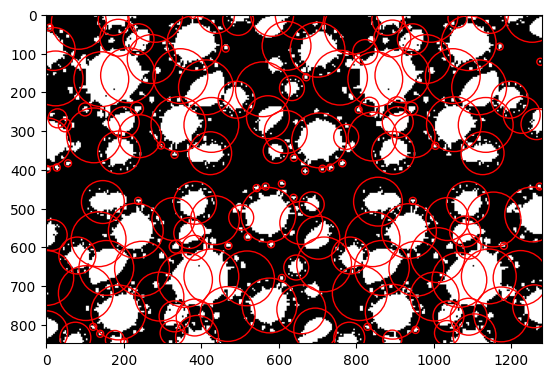

In [6]:
blobs = blob_doh(im_mask, max_sigma=50, threshold=.01)

fig, ax = plt.subplots()
ax.imshow(im_bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*sqrt(2), color='r', fill=False))
plt.show()

While this method did not break the large objects down into tiny blobs, it seemed to use blobs that exceeded the effective area of the objects being detected. It handled elongated blobs better at the expense of less precise blob detection on the more regularly shaped objects in the image

Homework: Experiment what you get without binarization. Try different max_sigma, like 20, 30, 80. Don't send the result but be ready to comment it during the examination